<h1 style = "color : Sky blue"> Plotting Exercise(Numpy Attributes)</h1>

As you learnt in the session, data visualisation is an essential skill for a data scientist to have. Charts and graphs are the easiest way to communicate data to different kinds of consumers. The assessments in this notebook will test your ability to represent information. The questions will be investigative and will not have detailed instructions about the execution; you will have to figure that part out yourself. Don't worry, there are no wrong answers here, only happy accidents. Try these questions on your own, to verify if you have done the task correctly, look at the solution as a person who does not know the data and is looking at it for the first time. You will be able to identify better ways to represent data automatically.  

The dataset given for this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes. 

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data into a dataframe
data = pd.read_csv("diamonds.csv", header = 0)

# As a preparatory step, let's drop Unnamed column.
data = data.drop("Unnamed: 0", axis =1 )

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

###### Solution 

You have been asked to investigate the prices of diamonds, not its variation with respect to any other variable. What information can be gained by studying just one variable? Think about it for a moment. Can you find the highest price of a diamond? Yes. You can also find the distribution of prices. What kind of plot can be used to show the distribution of a variable? The best-situated plot is a histogram. You can use a histogram to create 'bins' in the variable and plot the count of data points in each bin. A histogram will give you the distribution of data. 

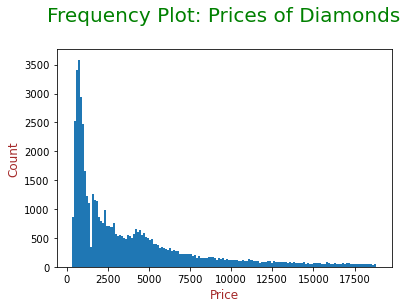

In [4]:
plt.hist(data["price"], bins = 150)

# Adding and formatting title
plt.title("Frequency Plot: Prices of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Observations from the **histogram** 

1. The histogram has a long tail towards the right side. 
2. There are two peaks in the data, one near 500-1000 USD and the other near 4000-5000 USD. 

<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

##### Solution 

The observations in the variable cut are categories, not values like price or carat. So you will not be able to use a histogram to do a count analysis as you did earlier. For this kind of variable, you have to use a bar plot to compare the counts of observations in each category. You can use other plot types like pie chart doughnut chart, but it isn't easy to compare the counts of each class. 

In [5]:
# Before plotting extract the required data by performing necessary data manipulation
groupdata = data.groupby("cut").count()
groupdata

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [6]:
# Create lists which hold the necessary data
x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]: 
    # The elements in the list are arranged in increasing order of the quality of cut. 
    # This information can be gathered from the data dictionary.  
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])

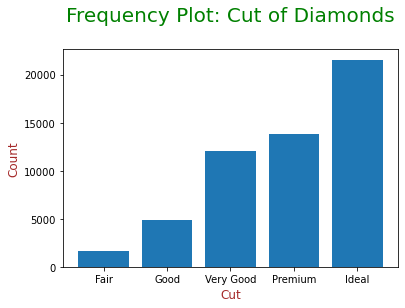

In [7]:
plt.bar(x_vals, y_vals)

# Adding and formatting title
plt.title("Frequency Plot: Cut of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Observations: 
1. The number of diamonds goes on increasing with increasing quality of cut. 


<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

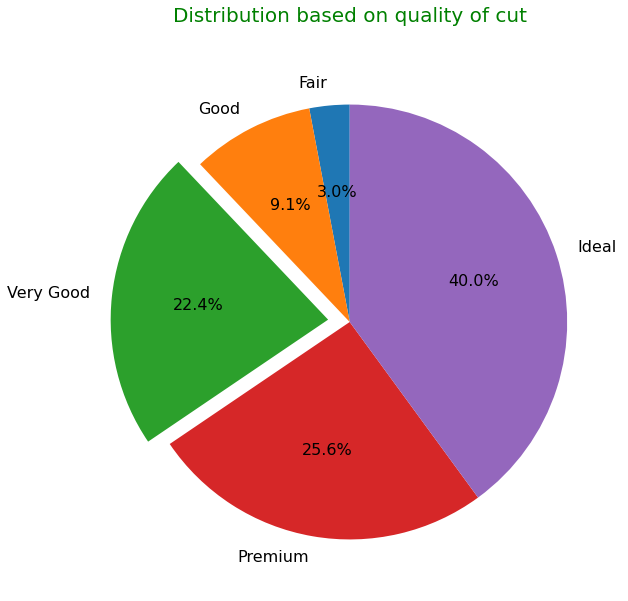

In [44]:
explode = (0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [10,10])

plt.pie(y_vals, explode=explode, labels=x_vals, autopct='%0.1f%%',
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

As you can see, a pie chart, although visually attractive, is not a good tool to represent information. The changes in the different sectors are not noticeable. It is absolutely necessary to have written values. Now compare the same with the bar diagram earlier, the relative differences in the distribution are very clear even without the data labels. 

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

In cases like these, where you investigate the relationship between two continuous variables, a scatter plot is the best device

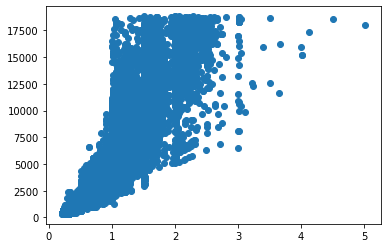

In [55]:
plt.scatter(data = data , x = 'carat', y = 'price')
plt.show()

The scatter plot with default settings looks very crowded, that is because there are a lot of data points, there are a couple of ways to solve this problem; you can either draw a smaller sample (you will learn sampling techniques in latter modules) or use smaller and more transparent markers. You can also make the plot larger.

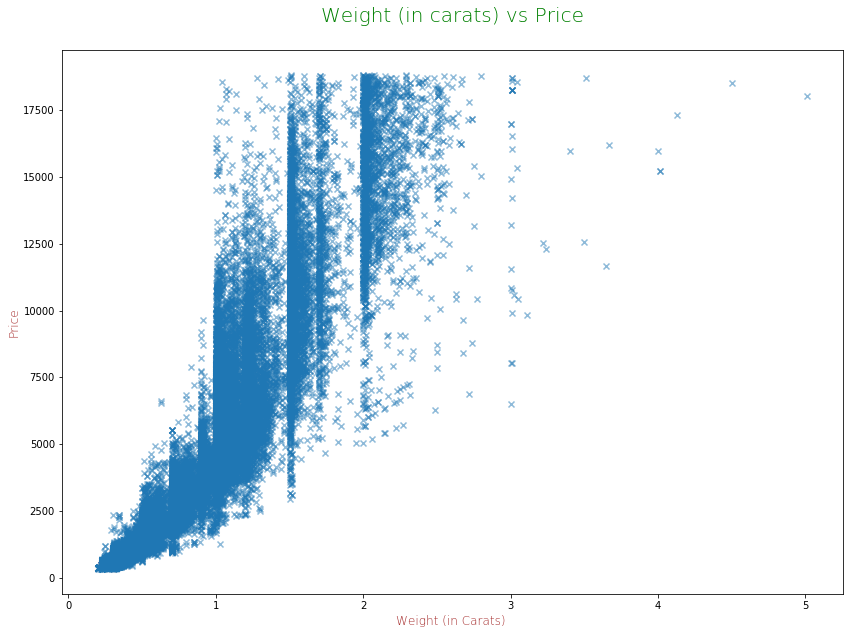

In [56]:
plt.figure(figsize = [14,10])
plt.scatter(data = data , x = 'carat', y = 'price', alpha = 0.5, marker="x")

# Adding and formatting title
plt.title("Weight (in carats) vs Price\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Weight (in Carats) ", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Observations:
1. A general trend observed is as the weight in carats goes on increasing so does the price. 
2. There are specific weights to which diamonds are manufactured. 
3. There is also a lot of variation in price with the same weight. 


<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

As you already know, "cut" is a categorical variable, and it will not be possible to use a scatter plot to analyse the variation. So you can explore the data in a lot of different ways like use colors to the display cut information in the above plot that is an excellent idea, you can try that on your own. You can also divide the data according to the cut and then plot box plots for each of the cuts. Such a plot will allow you to investigate the variation of statistical price data across various cuts. 

In [45]:
# Create the required dataframes
data_fair = data[data['cut'] == 'Fair']
data_good = data[data['cut'] == 'Good']
data_vgood = data[data['cut'] == 'Very Good']
data_premium = data[data['cut'] == 'Premium']
data_ideal = data[data['cut'] == 'Ideal']

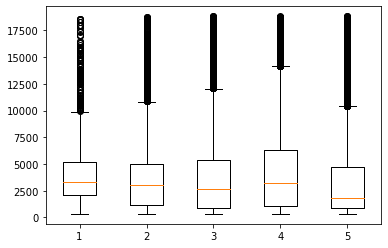

In [46]:
plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])
plt.show()

It looks like there are a lot of outliers in the data, which are making the data hard to analyse. Let's drop all the observations **above 12500 USD** as all of them are outliers. 

In [43]:
data_fair = data[(data['cut'] == 'Fair') & (data['price'] < 12500) ]
data_good = data[(data['cut'] == 'Good') & (data['price'] < 12500)]
data_vgood = data[(data['cut'] == 'Very Good') & (data['price'] < 12500)]
data_premium = data[(data['cut'] == 'Premium') & (data['price'] < 12500)]
data_ideal = data[(data['cut'] == 'Ideal') & (data['price'] < 12500)]

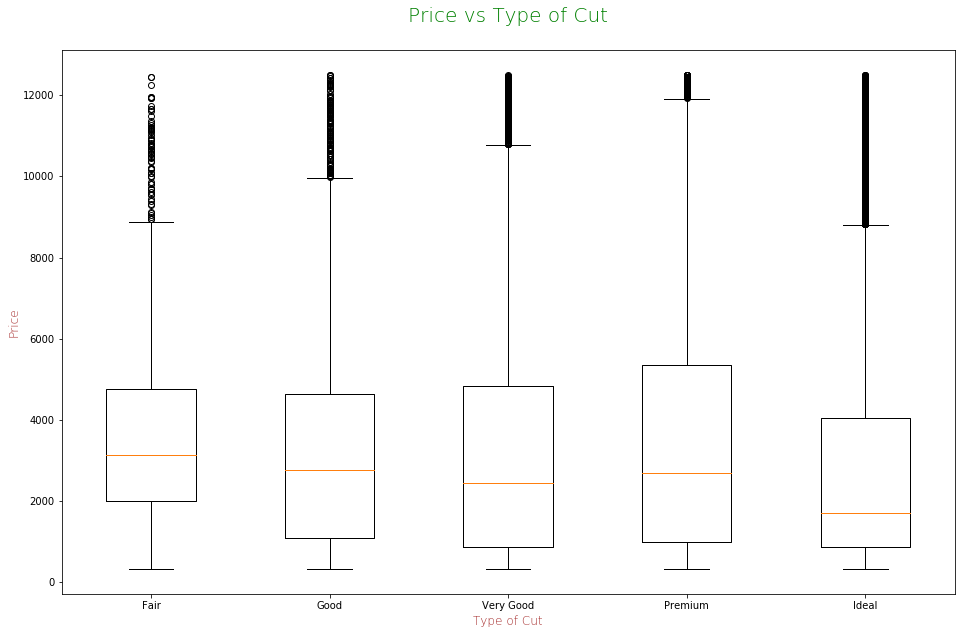

In [57]:
plt.figure(figsize = [16,10])
plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])

plt.xticks((1,2,3,4,5), ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

# Adding and formatting title
plt.title("Price vs Type of Cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type of Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

Be cautious while making such modifications because the overall impact on the data is not very well explored yet, it might be possible that the average of different classes is affected differently. Luckily, in this case, the trend before and after the modification looks similar, but again caution is advised. 

Observations: 
1. The median price of the ideal cut is the least among all the five. 
2. There are a lot of outliers in the ideal cut.

Go over all the plots that have been created and make them more presentable.

A few codes in this exercise were more labour intensive than smart. The next library you will study that is seaborn is a much more sophisticated library which will give you all the flexibility you need. You needed to learn two things here, use of matplotlib and the thought process behind visualising data. 

Hopefully, you were able to solve all the questions to produce an outcome of the desired level. **Great job!** 